# Instructor Lab

In [4]:

#Load the Modules

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

## Prep Data and Add a New Record

In [2]:

# Check the current working directory

os.getcwd()

'/home/schoo/Documents/python/week_9/week9labs-main'

In [14]:

# Read in the two data sets

hospital_data = pd.read_csv("data/CaliforniaHospitalData.csv")
personnel_data = pd.read_table("data/CaliforniaHospitalData_Personnel.txt")

# Print to confirm

hospital_data.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,34916220.47,49933713,-5505933,15
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,20348596.22,53351748,-444391,99
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,37832448.33,72933707,-2152920,107
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,24661355.90,51087341,3040415,55
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,15159986.51,42845642,14001153,42


In [7]:

# Print to confirm

personnel_data.head()


,HospitalID,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate,Phone,Email
0,35665,351131,Cherukuri,Dileep,M,4,Safety Inspection Member,23987,2,1/1/2019,405-564-5580,dileep.cherukuri@okstate.edu
1,12145,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009,405-744-2238,jose.rodriguez@edihealth.com
2,45771,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2011,405-744-2238,jose.rodriguez@edihealth.com
3,43353,756481,Rodriguez,Jose,M,4,Safety Inspection Member,23987,2,1/1/2011,405-744-2238,jose.rodriguez@edihealth.com
4,17718,811240,Charles,Kenneth,M,1,Regional Representative,46978,4,1/1/2009,405-744-3412,kenneth.charles@edihealth.com


Great! They appear to be laoded in correctly! Let's now join the files and remove some columns.

In [18]:

#Merge the data of the two files

merged_data = hospital_data.merge(personnel_data, how = 'inner', on='HospitalID')

#Remove the columns

merged_data = merged_data.drop(merged_data.columns[[3,14,18]], axis=1)

#Add Records

new_rows = pd.DataFrame({'HospitalID': [45067],  
                         'Name': ['Glenn Medical Center'],
                         'Zip' : [95988-2745,],
                         'TypeControl': ['Non Profit'],
                         'Teaching' : ['Small/Rural'],
                         'DonorType' : ['Charity'],
                         'NoFTE' : ['100.00'],
                         'NetPatRev' : [29712.33060],
                         'InOperExp' : [5669283],
                         'OutOperExp' : [5026417],
                         'OperRev' : [10974800],
                         'OperInc' : [279100],
                         'AvlBeds' : [121],
                         'LastName': ['Simpson'],
                         'FirstName' : ['Spencer'],
                         'Gender' : ['M'],
                         'PositionTitle' : ['Safety Inspection Member'],
                         'Compensation' : [23987],
                         'MaxTerm' : [2],
                         'StartDate' : ['4/14/2025'],
                         'Phone' : ['405-635-8695'],
                         'Email' : ['spencer.simpson@edihealth.com']},
                        index = [29])


new_merge = pd.concat([merged_data,new_rows], ignore_index=True) # Merge the original data with the new_rows

#Convert to datetime64 datatype

new_merge['StartDate'] = pd.to_datetime(new_merge['StartDate']) 

#Print to confirm

new_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     62 non-null     int64         
 1   Name           62 non-null     object        
 2   Zip            62 non-null     object        
 3   TypeControl    62 non-null     object        
 4   Teaching       62 non-null     object        
 5   DonorType      62 non-null     object        
 6   NoFTE          62 non-null     object        
 7   NetPatRev      62 non-null     float64       
 8   InOperExp      62 non-null     float64       
 9   OutOperExp     62 non-null     float64       
 10  OperRev        62 non-null     int64         
 11  OperInc        62 non-null     int64         
 12  AvlBeds        62 non-null     int64         
 13  LastName       62 non-null     object        
 14  FirstName      62 non-null     object        
 15  Gender         62 non-nul

In [21]:

#Slap all of the object data type variables into a single variable

columns_conversion =['HospitalID','Name','Zip','TypeControl','Teaching','DonorType','LastName','FirstName',
          'Gender','PositionTitle','Phone','Email']

#Convert the variables to the category data type

new_merge[columns_conversion] = new_merge[columns_conversion].astype('category')

#We need to change the NoFTE to float64
new_merge['NoFTE'] = new_merge['NoFTE'].astype('float64')

#Print to confirm

new_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   HospitalID     62 non-null     category      
 1   Name           62 non-null     category      
 2   Zip            62 non-null     category      
 3   TypeControl    62 non-null     category      
 4   Teaching       62 non-null     category      
 5   DonorType      62 non-null     category      
 6   NoFTE          62 non-null     float64       
 7   NetPatRev      62 non-null     float64       
 8   InOperExp      62 non-null     float64       
 9   OutOperExp     62 non-null     float64       
 10  OperRev        62 non-null     int64         
 11  OperInc        62 non-null     int64         
 12  AvlBeds        62 non-null     int64         
 13  LastName       62 non-null     category      
 14  FirstName      62 non-null     category      
 15  Gender         62 non-nul

## Descriptive Statistics

In [25]:



#Establish the variables for the numerical variables

number_types = new_merge[['NoFTE','NetPatRev','InOperExp','OutOperExp','OperRev','OperInc',
                'AvlBeds','Compensation','MaxTerm']]

#Run the summary statistics

number_types.describe()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Compensation,MaxTerm
count,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000
mean,1330.098710,6.592631e+05,1.636802e+08,8.878499e+07,2.523169e+08,-1.483418e+05,193.338710,91665.241935,4.209677
std,2014.882342,1.091509e+06,2.812008e+08,1.365883e+08,4.226370e+08,7.095574e+07,220.205191,84302.035923,2.112702
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000,23987.000000,2.000000
25%,198.625000,6.501739e+04,1.363109e+07,1.425996e+07,2.403641e+07,-1.028922e+06,42.750000,46978.000000,3.000000
50%,368.660000,1.670720e+05,3.124469e+07,3.259692e+07,6.153388e+07,1.464124e+06,100.500000,46978.000000,4.000000
75%,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000,89473.000000,4.000000
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000,248904.000000,8.000000


In [26]:

#Now let's do the Categorical variables

new_merge[columns_conversion].describe()

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,LastName,FirstName,Gender,PositionTitle,Phone,Email
count,62,62,62,62,62,62,62,62,62,62,62,62
unique,61,61,62,4,2,2,24,20,2,4,25,25
top,45067,Glenn Medical Center,93243,Non Profit,Small/Rural,Charity,Smith,David,F,Regional Representative,405-744-2238,akira.iwata@hsu.edu
freq,2,2,1,38,45,45,4,6,32,24,3,3


### Histograms

<AxesSubplot: ylabel='Frequency'>

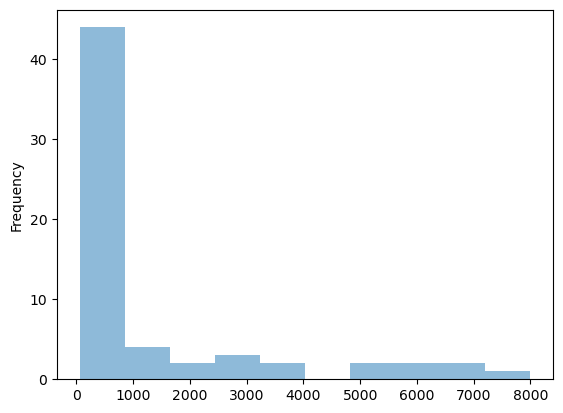

In [27]:

new_merge['NoFTE'].plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

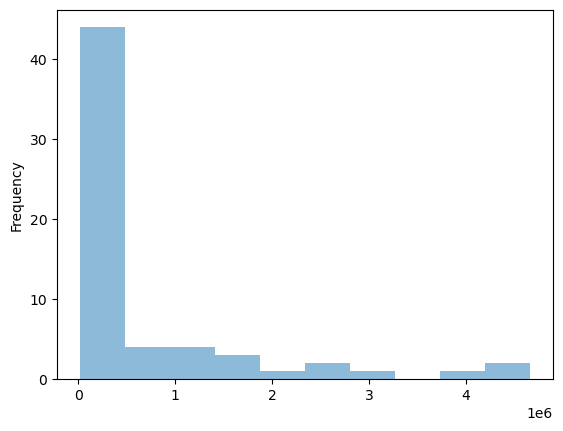

In [29]:
new_merge['NetPatRev'].plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

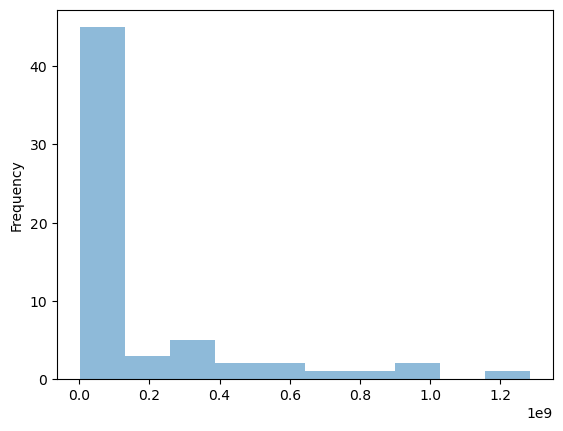

In [30]:
new_merge['InOperExp'].plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

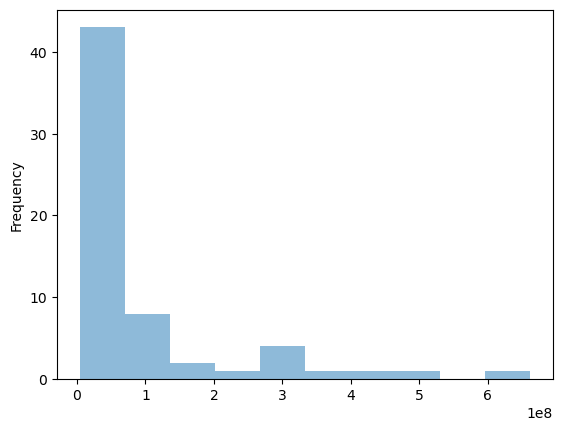

In [31]:
new_merge['OutOperExp'].plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

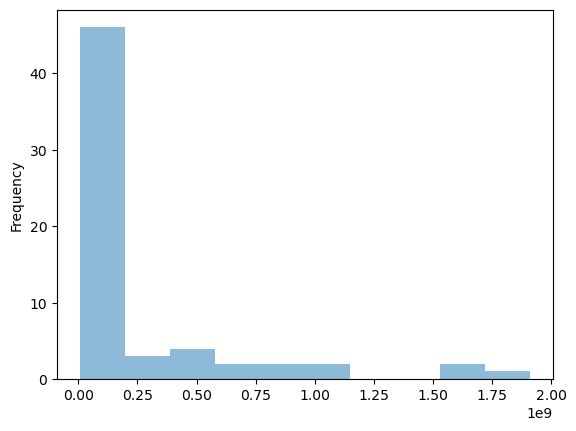

In [32]:
new_merge['OperRev'].plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

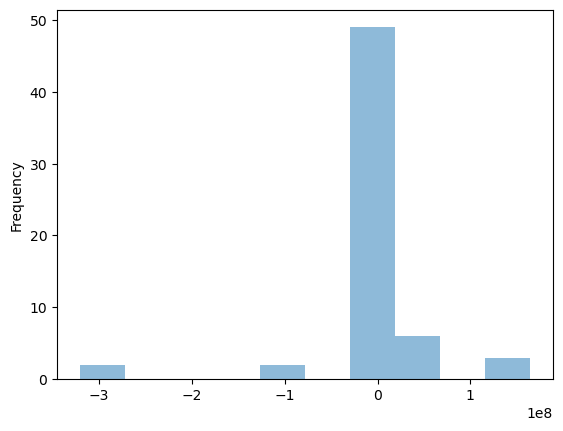

In [33]:
new_merge['OperInc'].plot.hist(alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

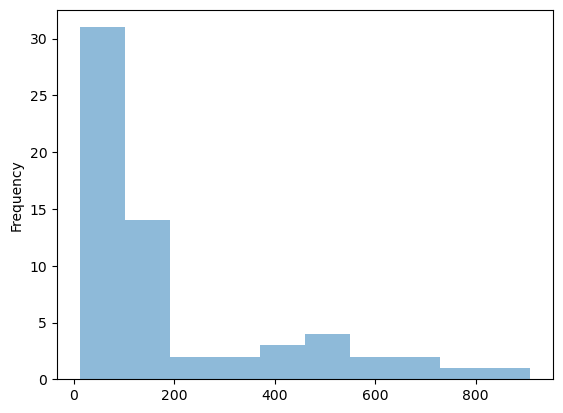

In [34]:
new_merge['AvlBeds'].plot.hist(alpha=0.5)

### Scatterplots

<AxesSubplot: xlabel='NoFTE', ylabel='NetPatRev'>

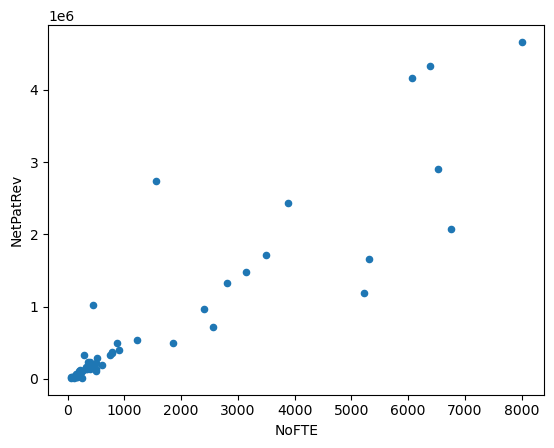

In [35]:
new_merge.plot.scatter(x='NoFTE',y='NetPatRev')

Appears to be fairly linear in its relationship. There are some outliers

<AxesSubplot: xlabel='InOperExp', ylabel='NetPatRev'>

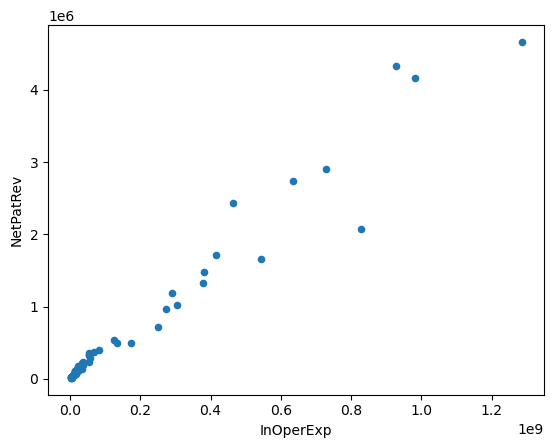

In [36]:
new_merge.plot.scatter(x='InOperExp',y='NetPatRev')

Appears to be fairly linear.

<AxesSubplot: xlabel='OutOperExp', ylabel='NetPatRev'>

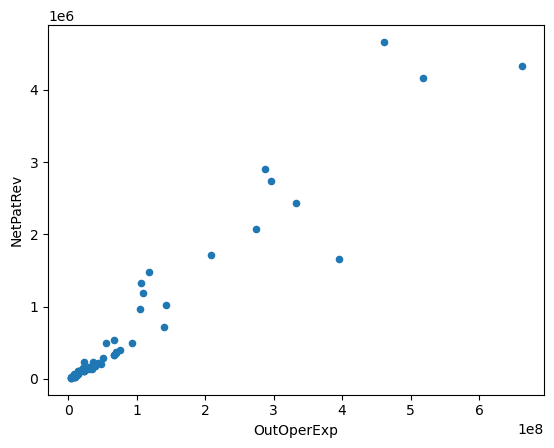

In [37]:
new_merge.plot.scatter(x='OutOperExp',y='NetPatRev')

Appears to be somewhat linear

<AxesSubplot: xlabel='OperRev', ylabel='NetPatRev'>

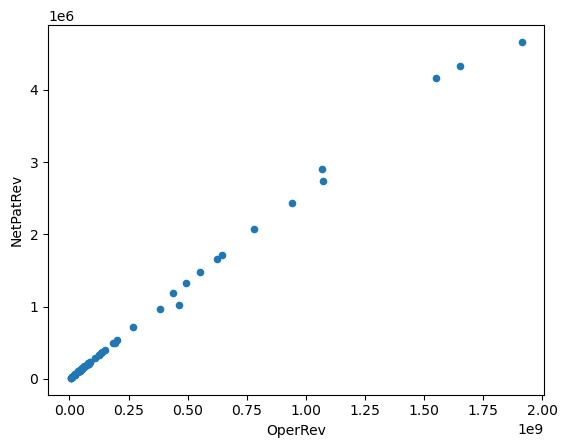

In [38]:
new_merge.plot.scatter(x='OperRev',y='NetPatRev')

Appears to be very lienar, with little to no variance.

<AxesSubplot: xlabel='OperInc', ylabel='NetPatRev'>

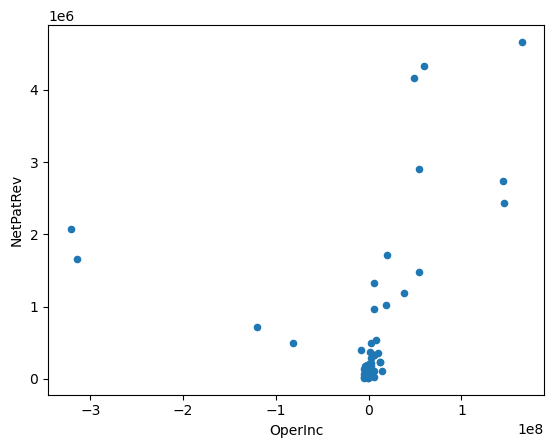

In [40]:
new_merge.plot.scatter(x='OperInc',y='NetPatRev')

The relationship between Operating Income and Net Patient Revenue does NOT appear to be linear

<AxesSubplot: xlabel='AvlBeds', ylabel='NetPatRev'>

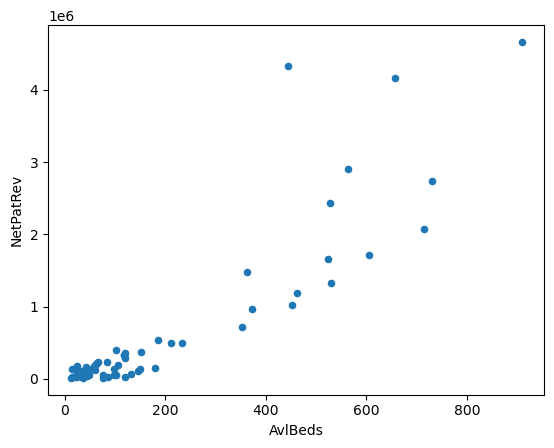

In [41]:
new_merge.plot.scatter(x='AvlBeds',y='NetPatRev')

Appears to be somewhat linear.

### Boxplot

<AxesSubplot: >

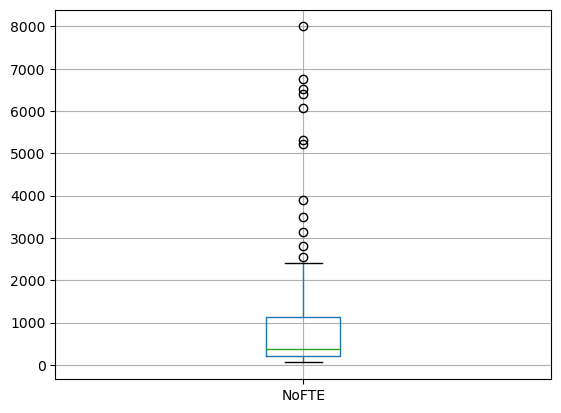

In [52]:
new_merge.loc[:,['NoFTE']].boxplot()

<AxesSubplot: >

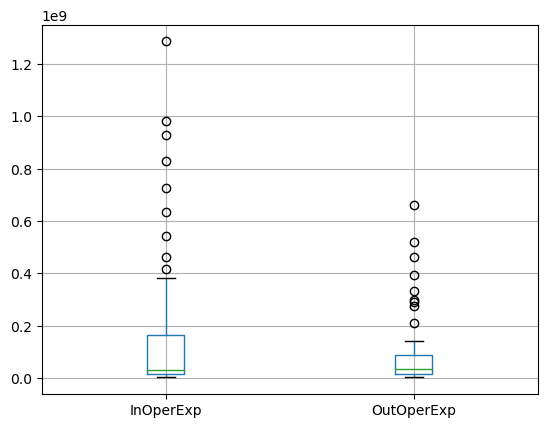

In [62]:
new_merge.loc[:,['InOperExp','OutOperExp']].boxplot()

<AxesSubplot: >

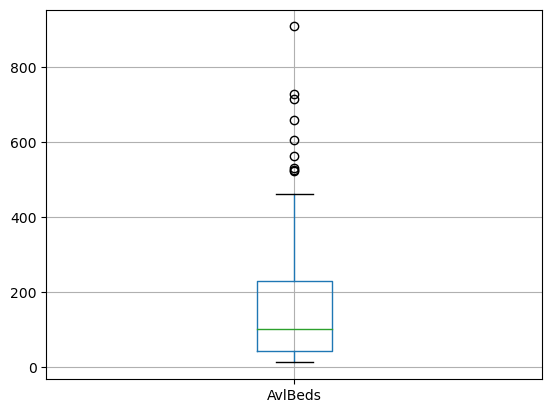

In [55]:
new_merge.loc[:,['AvlBeds']].boxplot()

<AxesSubplot: >

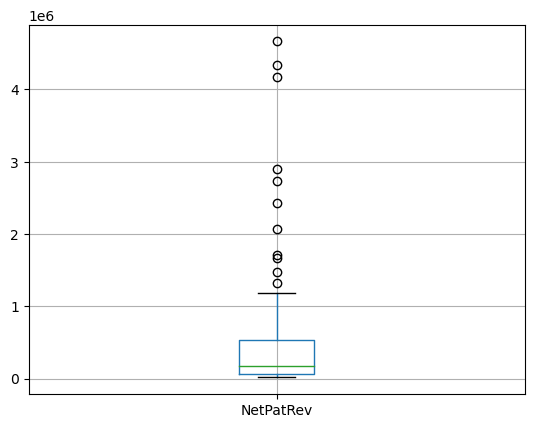

In [60]:
new_merge.loc[:,['NetPatRev']].boxplot()

<AxesSubplot: >

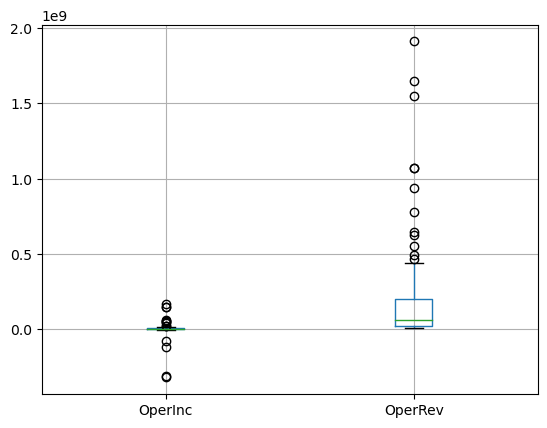

In [61]:
new_merge.loc[:,['OperInc','OperRev']].boxplot()

### QQ-Plot

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([-4.70532520e+05, -3.95297204e+05, -3.71846695e+05, -2.81507331e+05

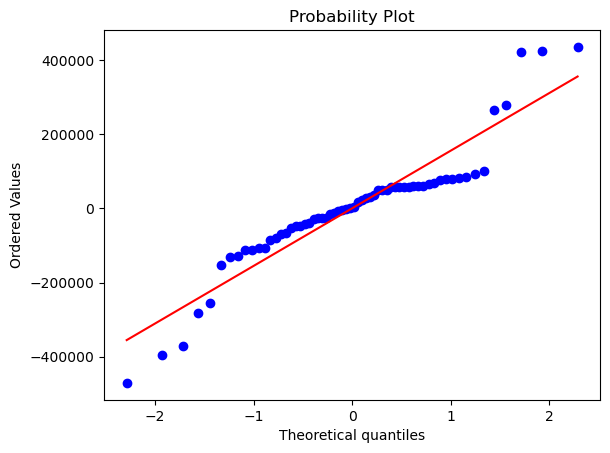

In [64]:

#Create the model

lin_reg_model = smf.ols('NetPatRev ~ OperInc + OutOperExp + AvlBeds', new_merge).fit()

#QQ-plot

sts.probplot(lin_reg_model.resid, dist='norm', plot=plt)

By observing the QQ-plot, we can see that there appears to be a problem with normality. There seems to be an 's' curve within the data points. 

### Shapiro-Wilks test

In [65]:
sts.shapiro(new_merge.OperInc)

ShapiroResult(statistic=0.5554274916648865, pvalue=2.033471481477367e-12)

In [66]:
sts.shapiro(new_merge.OutOperExp)

ShapiroResult(statistic=0.633477509021759, pvalue=3.56429052938978e-11)

In [67]:
sts.shapiro(new_merge.AvlBeds)

ShapiroResult(statistic=0.7599503993988037, pvalue=1.0474644263069877e-08)

The p-values for all of the Shapiro-Wilk test are all less than (alpha = 0.05), suggesting that the datapoints for these variables are not normally distributed. This alligns with the suggestion of the QQ-plot results.